In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


## QUESTION #1

In [120]:
# Real Gross Domestic Product (GDPC1), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [125]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1['avg_gdpc1_us_yoy'] = gdpc1['gdpc1_us_yoy'].rolling(4).mean().round(3)*100
print(gdpc1.tail(7), "\n")

print(f"The answer is", gdpc1.avg_gdpc1_us_yoy.iloc[-1])

                GDPC1  gdpc1_us_yoy  gdpc1_us_qoq  avg_gdpc1_us_yoy
DATE                                                               
2022-04-01  21708.160      0.018706     -0.001413               3.9
2022-07-01  21851.134      0.017132      0.006586               3.1
2022-10-01  21989.981      0.006517      0.006354               2.0
2023-01-01  22112.329      0.017179      0.005564               1.5
2023-04-01  22225.350      0.023825      0.005111               1.6
2023-07-01  22490.692      0.029269      0.011939               1.9
2023-10-01  22679.255      0.031345      0.008384               2.5 

The answer is 2.5


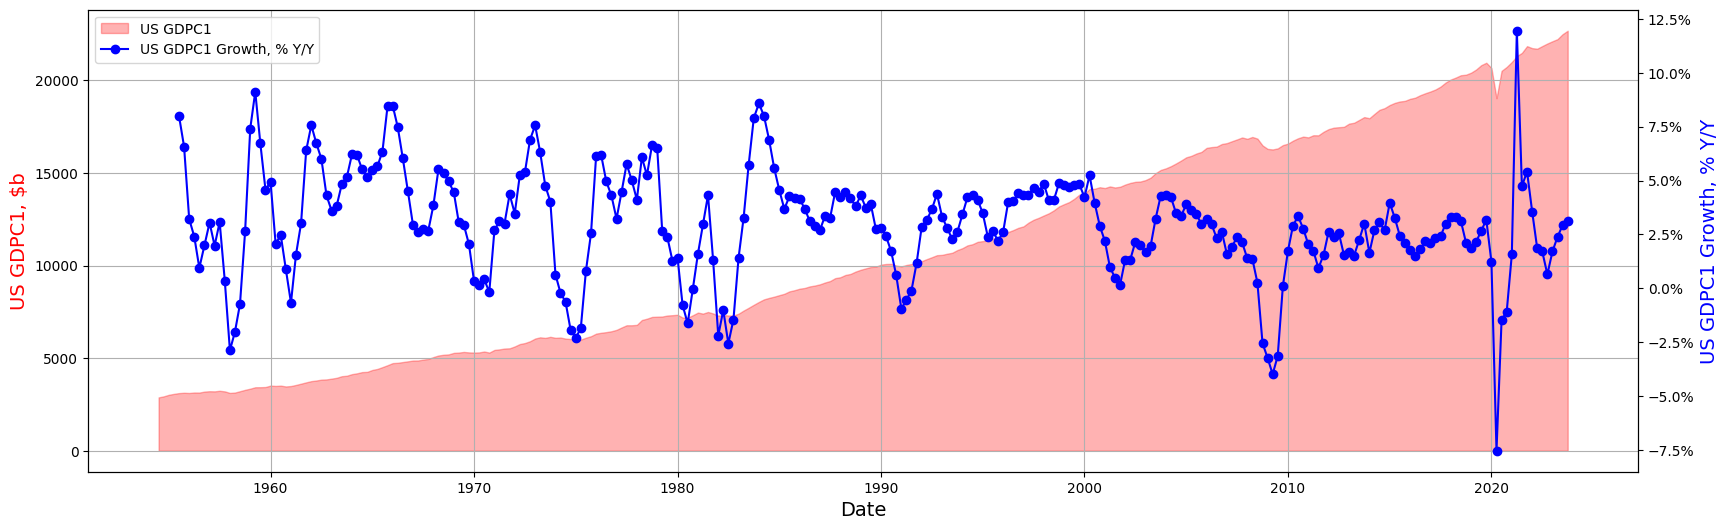

In [294]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US GDPC1")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US GDPC1 Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US GDPC1, $b", color="red", fontsize=14)
ax2.set_ylabel("US GDPC1 Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## QUESTION #2

In [33]:
# # "DGS2 and DGS10 interest rates series"
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/DGS10
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [36]:
dgs2['dgs2_yoy'] = dgs2.DGS2/dgs2.DGS2.shift(12)-1
dgs2['dgs2_mom'] = dgs2.DGS2/dgs2.DGS2.shift(1)-1

dgs2_2000_now = dgs2.loc['2000-01-01':]

dgs2_2000_now.head(5)

,DGS2,dgs2_yoy,dgs2_mom
DATE,,,
2000-01-03,6.38,0.037398,0.022436
2000-01-04,6.30,0.024390,-0.012539
2000-01-05,6.38,0.027375,0.012698
2000-01-06,6.35,0.022544,-0.004702
2000-01-07,6.31,0.011218,-0.006299


In [64]:
dgs10['dgs10_yoy'] = dgs10.DGS10/dgs10.DGS10.shift(12)-1
dgs10['dgs10_mom'] = dgs10.DGS10/dgs10.DGS10.shift(1)-1

dgs10_2000_now = dgs10.loc['2000-01-01':]

dgs10_2000_now

,DGS10,dgs10_yoy,dgs10_mom
DATE,,,
2000-01-03,6.58,0.042789,0.020155
2000-01-04,6.49,0.030159,-0.013678
2000-01-05,6.62,0.040881,0.020031
2000-01-06,6.57,0.029781,-0.007553
2000-01-07,6.52,0.020344,-0.007610
...,...,...,...
2024-04-12,4.50,0.071429,-0.013158
2024-04-15,4.63,0.102381,0.028889
2024-04-16,4.67,NaN,0.008639


In [66]:
dgs2_dgs10 = pd.merge(dgs2_2000_now, dgs10_2000_now, left_index=True, right_index=True, suffixes=('_dgs2', '_dgs10'))[["DGS10", "DGS2"]]

dgs2_dgs10

,DGS10,DGS2
DATE,,
2000-01-03,6.58,6.38
2000-01-04,6.49,6.30
2000-01-05,6.62,6.38
2000-01-06,6.57,6.35
2000-01-07,6.52,6.31
...,...,...
2024-04-12,4.50,4.88
2024-04-15,4.63,4.93
2024-04-16,4.67,4.97


In [82]:
dgs2_dgs10["diff_DGS10_DGS2"] = dgs2_dgs10.DGS10 - dgs2_dgs10.DGS2
min_dgs2_dgs10 = dgs2_dgs10["diff_DGS10_DGS2"].min().round(1)

print(dgs2_dgs10.sort_values("diff_DGS10_DGS2", ascending=True).head(5), "\n")

print(f"The answer is {min_dgs2_dgs10} on {dgs2_dgs10['diff_DGS10_DGS2'].idxmin()}")

            DGS10  DGS2  diff_DGS10_DGS2
DATE                                    
2023-07-03   3.86  4.94            -1.08
2023-03-08   3.98  5.05            -1.07
2023-06-30   3.81  4.87            -1.06
2023-03-07   3.97  5.00            -1.03
2023-06-29   3.85  4.87            -1.02 

The answer is -1.1 on 2023-07-03 00:00:00


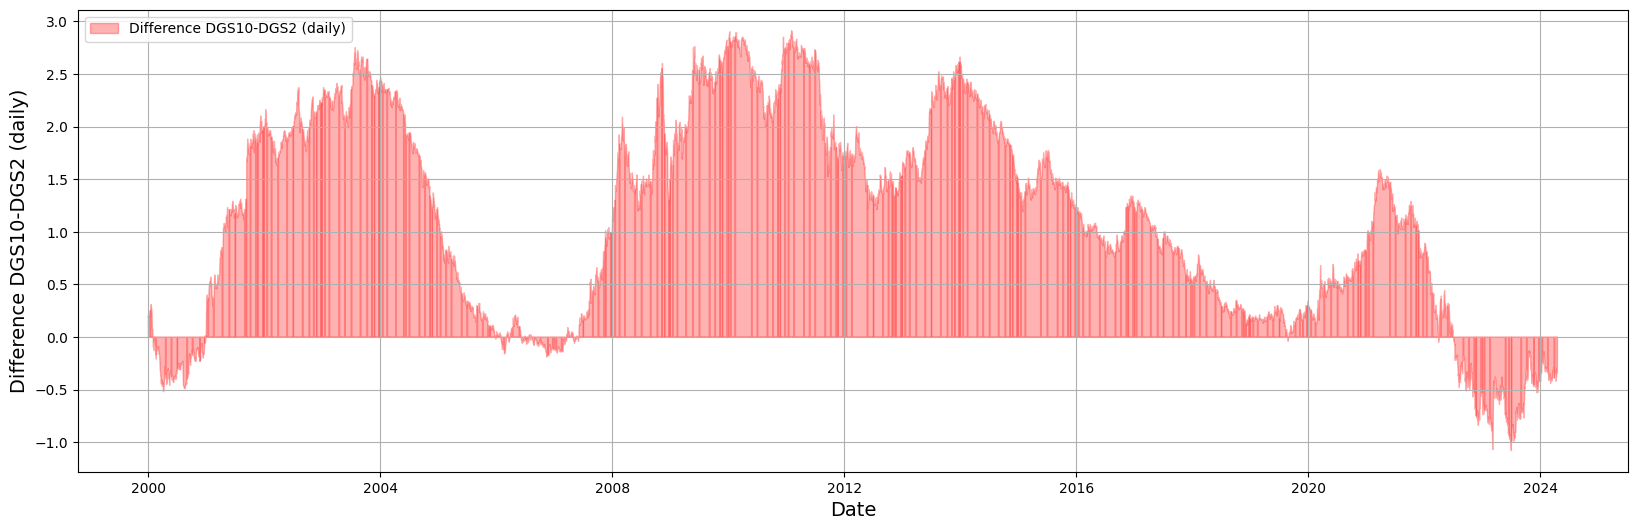

In [83]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(dgs2_dgs10.index, dgs2_dgs10.diff_DGS10_DGS2, color="red", alpha=0.3, label="Difference DGS10-DGS2 (daily)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Difference DGS10-DGS2 (daily)", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

## 1.3 Interest rates

In [ ]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33


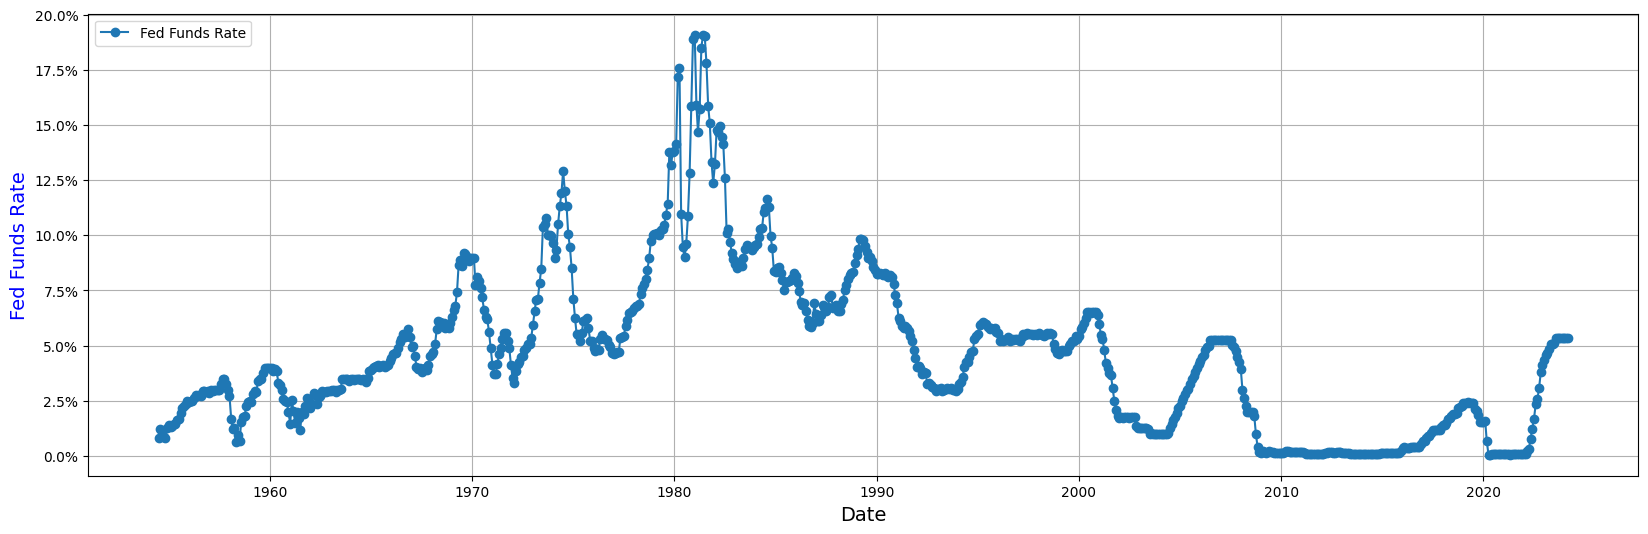

In [ ]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [ ]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-04-03,5.03
2024-04-04,5.00
2024-04-05,5.05
2024-04-08,5.07
2024-04-09,5.03


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [ ]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-04-03,4.34
2024-04-04,4.30
2024-04-05,4.38
2024-04-08,4.43
2024-04-09,4.37


## 1.4 SNP500

In [ ]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-09,5217.03,5224.81,5160.78,5209.91,2.028227e+09
2024-04-08,5211.37,5219.57,5197.35,5202.39,2.000910e+09
2024-04-05,5158.95,5222.18,5157.21,5204.34,2.189563e+09
2024-04-04,5244.05,5256.59,5146.06,5147.21,2.526871e+09
2024-04-03,5194.37,5228.75,5194.37,5211.49,2.287219e+09


In [ ]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [ ]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-09,5217.03,5224.81,5160.78,5209.91,2.028227e+09,0.001445,0.093706,0.269156
2024-04-08,5211.37,5219.57,5197.35,5202.39,2.000910e+09,-0.000375,0.107542,0.271860
2024-04-05,5158.95,5222.18,5157.21,5204.34,2.189563e+09,0.011099,0.109980,0.269165
2024-04-04,5244.05,5256.59,5146.06,5147.21,2.526871e+09,-0.012334,0.094031,0.247957
2024-04-03,5194.37,5228.75,5194.37,5211.49,2.287219e+09,0.001091,0.098814,0.268215


In [ ]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

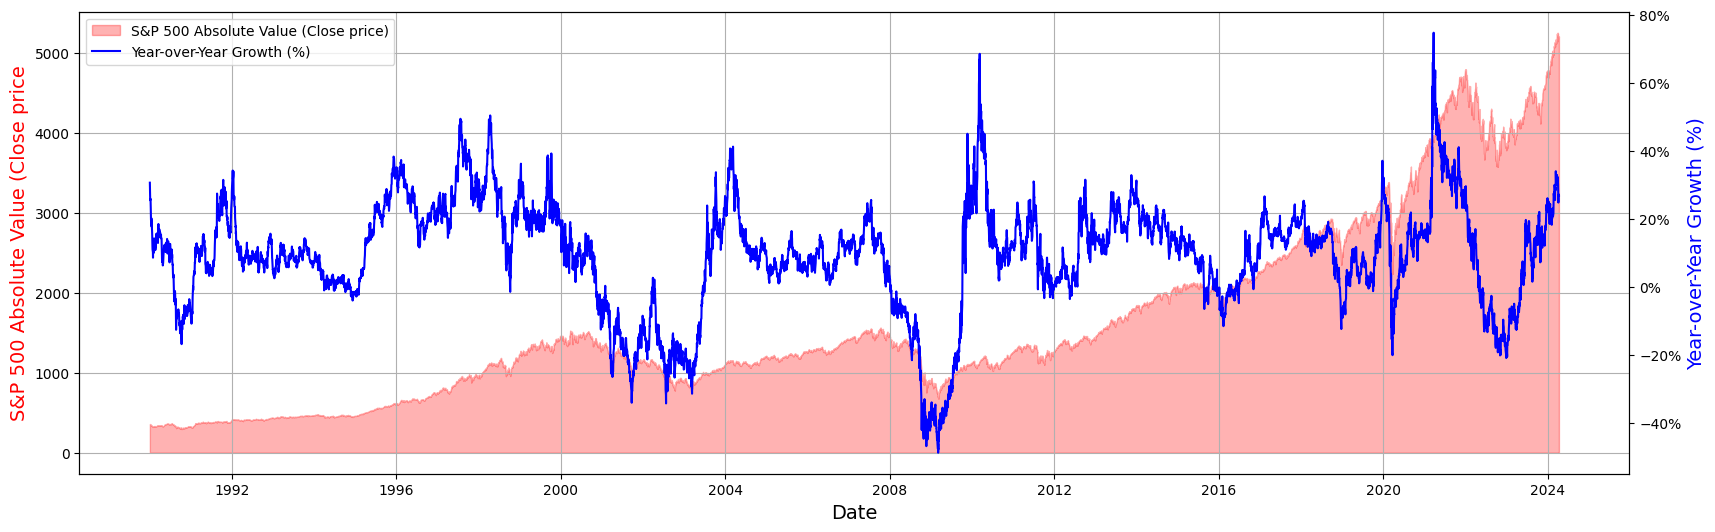

In [ ]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [ ]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,18366.369141,18427.429688,18340.240234,18403.130859,18403.130859,62521400
2024-04-05,18401.830078,18401.830078,18088.029297,18175.039062,18175.039062,77046500
2024-04-08,18163.390625,18326.369141,18163.390625,18318.970703,18318.970703,61073600
2024-04-09,18318.400391,18318.509766,18058.220703,18076.689453,18076.689453,65276400
2024-04-10,18078.890625,18239.500000,17975.839844,18097.300781,18097.300781,0


In [ ]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [ ]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-04,18366.369141,18427.429688,18340.240234,18403.130859,18403.130859,62521400,15597.889648,0.179847
2024-04-05,18401.830078,18401.830078,18088.029297,18175.039062,18175.039062,77046500,15655.169922,0.160961
2024-04-08,18163.390625,18326.369141,18163.390625,18318.970703,18318.970703,61073600,15703.599609,0.166546


<Axes: xlabel='Date'>

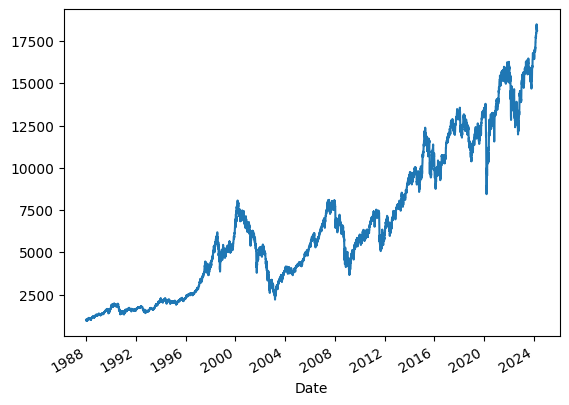

In [ ]:
dax_daily['Adj Close'].plot.line()

In [ ]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,2287781675


In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,2288234000


In [ ]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


## QUESTION #3

In [91]:
# SNP500 - SNP Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/%5EGSPC/
SP500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [113]:
SP500_daily_2019_2024 = SP500_daily[(SP500_daily.index >='2019-04-09') & (SP500_daily.index <='2024-04-09')][["High", "Low"]]

SP500_daily_2019_2024

,High,Low
Date,,
2019-04-09,2886.879883,2873.330078
2019-04-10,2889.709961,2879.129883
2019-04-11,2893.419922,2881.989990
2019-04-12,2910.540039,2898.370117
2019-04-15,2909.600098,2896.479980
...,...,...
2024-04-03,5228.750000,5194.370117
2024-04-04,5256.589844,5146.060059
2024-04-05,5222.180176,5157.209961


In [89]:
# IPC Mexico
# WEB: https://finance.yahoo.com/quote/%5EMXX/
IPC_Mexico_daily = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [114]:
IPC_Mexico_daily_2019_2024 = IPC_Mexico_daily[(IPC_Mexico_daily.index >='2019-04-09') & (IPC_Mexico_daily.index <='2024-04-09')][["High", "Low"]]

IPC_Mexico_daily_2019_2024

,High,Low
Date,,
2019-04-09,45346.828125,44854.531250
2019-04-10,45219.410156,44850.109375
2019-04-11,44966.500000,44373.488281
2019-04-12,44888.699219,44534.378906
2019-04-15,44900.929688,44347.531250
...,...,...
2024-04-03,58086.421875,57300.109375
2024-04-04,58219.500000,57514.179688
2024-04-05,58227.839844,57678.609375


In [115]:
SP500_IPC_Mexico = pd.merge(SP500_daily_2019_2024, IPC_Mexico_daily_2019_2024, on='Date', suffixes=('_SP500', '_IPC_Mexico'))

SP500_IPC_Mexico

,High_SP500,Low_SP500,High_IPC_Mexico,Low_IPC_Mexico
Date,,,,
2019-04-09,2886.879883,2873.330078,45346.828125,44854.531250
2019-04-10,2889.709961,2879.129883,45219.410156,44850.109375
2019-04-11,2893.419922,2881.989990,44966.500000,44373.488281
2019-04-12,2910.540039,2898.370117,44888.699219,44534.378906
2019-04-15,2909.600098,2896.479980,44900.929688,44347.531250
...,...,...,...,...
2024-04-03,5228.750000,5194.370117,58086.421875,57300.109375
2024-04-04,5256.589844,5146.060059,58219.500000,57514.179688
2024-04-05,5222.180176,5157.209961,58227.839844,57678.609375


In [119]:
SP500_5Y_growth = ((SP500_IPC_Mexico.iloc[-1, 0] / SP500_IPC_Mexico.iloc[0, 1] - 1)*100).round()
print("5Y growth for S&P500, in %, is:", SP500_5Y_growth, "\n")

IPC_Mexico_5Y_growth = ((SP500_IPC_Mexico.iloc[-1, 2] / SP500_IPC_Mexico.iloc[0, 3] - 1)*100).round()
print("5Y growth for IPC Mexico, in %, is:", IPC_Mexico_5Y_growth, "\n")

5Y growth for S&P500, in %, is: 82.0 

5Y growth for IPC Mexico, in %, is: 30.0 



## QUESTION #4

In [139]:
# 2222.SR - Saudi Arabian Oil Company. Currency in SAR
# WEB: https://finance.yahoo.com/quote/2222.SR/
SR2222 = yf.download(tickers = "2222.SR",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [195]:
SR2222_Adj_Close = SR2222[["Adj Close"]][(SR2222.index >= '2023-01-01') & (SR2222.index <= '2023-12-31')]
SR2222_Adj_Close

,Adj Close
Date,
2023-01-01,28.475794
2023-01-02,28.256075
2023-01-03,28.256075
2023-01-04,27.860575
2023-01-05,27.728746
...,...
2023-12-25,32.927525
2023-12-26,32.877789
2023-12-27,32.977268


In [189]:
SR2222_Adj_Close_min = SR2222_Adj_Close["Adj Close"].min()
SR2222_Adj_Close_max = SR2222_Adj_Close["Adj Close"].max()

Ratio_SR2222_Adj_Close = ((SR2222_Adj_Close_max - SR2222_Adj_Close_min) / SR2222_Adj_Close_max).round(2)
print("The Adj.Close ratio for 2222.SR is", Ratio_SR2222_Adj_Close)

The Adj.Close ratio for 2222.SR is 0.21


In [156]:
# BRK-B - Berkshire Hathaway Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/BRK-B/
BRKB = yf.download(tickers = "BRK-B",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [196]:
BRKB_Adj_Close = BRKB[["Adj Close"]][(BRKB.index >= '2023-01-01') & (BRKB.index <= '2023-12-31')]
BRKB_Adj_Close

,Adj Close
Date,
2023-01-03,309.910004
2023-01-04,314.549988
2023-01-05,312.899994
2023-01-06,318.690002
2023-01-09,315.529999
...,...
2023-12-22,356.470001
2023-12-26,356.829987
2023-12-27,356.950012


In [188]:
BRKB_Adj_Close_min = BRKB_Adj_Close["Adj Close"].min()
BRKB_Adj_Close_max = BRKB_Adj_Close["Adj Close"].max()

Ratio_BRKB_Adj_Close = ((BRKB_Adj_Close_max - BRKB_Adj_Close_min) / BRKB_Adj_Close_max).round(2)
print("The Adj.Close ratio for BRK-B is", Ratio_BRKB_Adj_Close)

The Adj.Close ratio for BRK-B is 0.21


In [153]:
# AAPL - Apple Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/AAPL/
AAPL = yf.download(tickers = "AAPL",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [197]:
AAPL_Adj_Close = AAPL[["Adj Close"]][(AAPL.index >= '2023-01-01') & (AAPL.index <= '2023-12-31')]
AAPL_Adj_Close

,Adj Close
Date,
2023-01-03,124.216301
2023-01-04,125.497505
2023-01-05,124.166641
2023-01-06,128.735245
2023-01-09,129.261627
...,...
2023-12-22,193.353287
2023-12-26,192.803986
2023-12-27,192.903839


In [178]:
AAPL_Adj_Close_min = AAPL_Adj_Close["Adj Close"].min()
AAPL_Adj_Close_max = AAPL_Adj_Close["Adj Close"].max()

Ratio_AAPL_Adj_Close = ((AAPL_Adj_Close_max - AAPL_Adj_Close_min) / AAPL_Adj_Close_max).round(2)
print("The Adj.Close ratio for AAPL is", Ratio_AAPL_Adj_Close)

The Adj.Close ratio for AAPL is 0.37


In [179]:
# MSFT - Microsoft Corporation. Currency in USD
# WEB: https://finance.yahoo.com/quote/MSFT/
MSFT = yf.download(tickers = "MSFT",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [198]:
MSFT_Adj_Close = MSFT[["Adj Close"]][(MSFT.index >= '2023-01-01') & (MSFT.index <= '2023-12-31')]
MSFT_Adj_Close

,Adj Close
Date,
2023-01-03,237.036011
2023-01-04,226.667282
2023-01-05,219.949371
2023-01-06,222.541565
2023-01-09,224.708298
...,...
2023-12-22,373.888580
2023-12-26,373.968445
2023-12-27,373.379547


In [181]:
MSFT_Adj_Close_min = MSFT_Adj_Close["Adj Close"].min()
MSFT_Adj_Close_max = MSFT_Adj_Close["Adj Close"].max()

Ratio_MSFT_Adj_Close = ((MSFT_Adj_Close_max - MSFT_Adj_Close_min) / MSFT_Adj_Close_max).round(2)
print("The Adj.Close ratio for MSFT is", Ratio_MSFT_Adj_Close)

The Adj.Close ratio for MSFT is 0.42


In [182]:
# GOOG - Alphabet Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/GOOG/
GOOG = yf.download(tickers = "GOOG",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [199]:
GOOG_Adj_Close = GOOG[["Adj Close"]][(GOOG.index >= '2023-01-01') & (GOOG.index <= '2023-12-31')]
GOOG_Adj_Close

,Adj Close
Date,
2023-01-03,89.699997
2023-01-04,88.709999
2023-01-05,86.769997
2023-01-06,88.160004
2023-01-09,88.800003
...,...
2023-12-22,142.720001
2023-12-26,142.820007
2023-12-27,141.440002


In [184]:
GOOG_Adj_Close_min = GOOG_Adj_Close["Adj Close"].min()
GOOG_Adj_Close_max = GOOG_Adj_Close["Adj Close"].max()

Ratio_GOOG_Adj_Close = ((GOOG_Adj_Close_max - GOOG_Adj_Close_min) / GOOG_Adj_Close_max).round(2)
print("The Adj.Close ratio for GOOG is", Ratio_GOOG_Adj_Close)

The Adj.Close ratio for GOOG is 0.39


In [185]:
# JPM - JPMorgan Chase & Co. Currency in USD
# WEB: https://finance.yahoo.com/quote/JPM/
JPM = yf.download(tickers = "JPM",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [200]:
JPM_Adj_Close = JPM[["Adj Close"]][(JPM.index >= '2023-01-01') & (JPM.index <= '2023-12-31')]
JPM_Adj_Close

,Adj Close
Date,
2023-01-03,129.648514
2023-01-04,130.857483
2023-01-05,130.828491
2023-01-06,133.331955
2023-01-09,132.781006
...,...
2023-12-22,165.409225
2023-12-26,166.387451
2023-12-27,167.385437


In [187]:
JPM_Adj_Close_min = JPM_Adj_Close["Adj Close"].min()
JPM_Adj_Close_max = JPM_Adj_Close["Adj Close"].max()

Ratio_JPM_Adj_Close = ((JPM_Adj_Close_max - JPM_Adj_Close_min) / JPM_Adj_Close_max).round(2)
print("The Adj.Close ratio for JPM is", Ratio_JPM_Adj_Close)

The Adj.Close ratio for JPM is 0.28


In [201]:
list_ratios = [Ratio_SR2222_Adj_Close, Ratio_BRKB_Adj_Close, Ratio_AAPL_Adj_Close, Ratio_MSFT_Adj_Close, Ratio_GOOG_Adj_Close, Ratio_JPM_Adj_Close]
print("The largest Adj. Close ratio between the 6 stocks is", max(list_ratios))

The largest Adj. Close ratio between the 6 stocks is 0.42


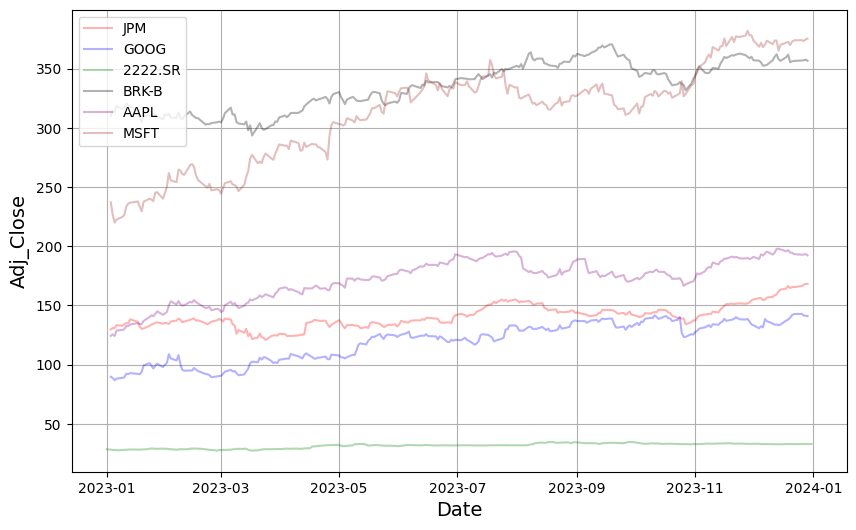

In [205]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)

# Plotting stock curves
ax.plot(SR2222_Adj_Close.index, SR2222_Adj_Close["Adj Close"], color="green", alpha=0.3, label="2222.SR")
ax.plot(BRKB_Adj_Close.index, BRKB_Adj_Close["Adj Close"], color="black", alpha=0.3, label="BRK-B")
ax.plot(AAPL_Adj_Close.index, AAPL_Adj_Close["Adj Close"], color="purple", alpha=0.3, label="AAPL")
ax.plot(MSFT_Adj_Close.index, MSFT_Adj_Close["Adj Close"], color="brown", alpha=0.3, label="MSFT")
ax.plot(GOOG_Adj_Close.index, GOOG_Adj_Close["Adj Close"], color="blue", alpha=0.3, label="GOOG")
ax.plot(JPM_Adj_Close.index, JPM_Adj_Close["Adj Close"], color="red", alpha=0.3, label="JPM")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Adj_Close", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

## QUESTION #5

In [283]:
import yfinance as yf
SR2222_dividends = yf.Ticker('2222.SR').get_actions().tail(7)
SR2222_dividends = SR2222_dividends.loc["2023-01-01":"2023-12-31"]
print(SR2222_dividends, "\n")

SR2222_dividends_sum = SR2222_dividends['Dividends'].sum()
print("The total dividends for 2222.SR in 2023 amount to:", SR2222_dividends_sum, "\n")

SR2222_Adj_Close_final = SR2222_Adj_Close.iloc[-1, 0]
print("The closing price for 2222.SR on the last trading day of the year 2023 is:", SR2222_Adj_Close_final, "\n")

SR2222_dividends_yield = (SR2222_dividends_sum/SR2222_Adj_Close_final * 100).round(1)
print("The dividend yield for 2222.SR in year 2023 is:", SR2222_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-03-15 00:00:00+03:00   0.302364           0.0
2023-05-09 00:00:00+03:00   0.000000           1.1
2023-05-17 00:00:00+03:00   0.302400           0.0
2023-09-11 00:00:00+03:00   0.153000           0.0
2023-11-15 00:00:00+03:00   0.153000           0.0 

The total dividends for 2222.SR in 2023 amount to: 0.9107640000000001 

The closing price for 2222.SR on the last trading day of the year 2023 is: 32.82804870605469 

The dividend yield for 2222.SR in year 2023 is: 2.8 %


In [285]:
BRKB_dividends = yf.Ticker('BRK-B').get_actions().tail(7)
BRKB_dividends = BRKB_dividends.loc["2023-01-01":"2023-12-31"]
print(BRKB_dividends, "\n")

BRKB_dividends_sum = BRKB_dividends['Dividends'].sum()
print("The total dividends for BRK-B in 2023 amount to:", BRKB_dividends_sum, "\n")

BRKB_Adj_Close_final = BRKB_Adj_Close.iloc[-1, 0]
print("The closing price for BRK-B on the last trading day of the year 2023 is:", BRKB_Adj_Close_final, "\n")

BRKB_dividends_yield = (BRKB_dividends_sum/BRKB_Adj_Close_final * 100).round(1)
print("The dividend yield for BRK-B in year 2023 is:", BRKB_dividends_yield, "%")


Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: [] 

The total dividends for BRK-B in 2023 amount to: 0.0 

The closing price for BRK-B on the last trading day of the year 2023 is: 356.6600036621094 

The dividend yield for BRK-B in year 2023 is: 0.0 %


In [286]:
MSFT_dividends = yf.Ticker('MSFT').get_actions().tail(7)
MSFT_dividends = MSFT_dividends.loc["2023-01-01":"2023-12-31"]
print(MSFT_dividends, "\n")

MSFT_dividends_sum = MSFT_dividends['Dividends'].sum()
print("The total dividends for MSFT in 2023 amount to:", MSFT_dividends_sum, "\n")

MSFT_Adj_Close_final = MSFT_Adj_Close.iloc[-1, 0]
print("The closing price for MSFT on the last trading day of the year 2023 is:", MSFT_Adj_Close_final, "\n")

MSFT_dividends_yield = (MSFT_dividends_sum/MSFT_Adj_Close_final * 100).round(1)
print("The dividend yield for MSFT in year 2023 is:", MSFT_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-02-15 00:00:00-05:00       0.68           0.0
2023-05-17 00:00:00-04:00       0.68           0.0
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0 

The total dividends for MSFT in 2023 amount to: 2.79 

The closing price for MSFT on the last trading day of the year 2023 is: 375.34588623046875 

The dividend yield for MSFT in year 2023 is: 0.7 %


In [288]:
AAPL_dividends = yf.Ticker('AAPL').get_actions().tail(7)
AAPL_dividends = AAPL_dividends.loc["2023-01-01":"2023-12-31"]
print(AAPL_dividends, "\n")

AAPL_dividends_sum = AAPL_dividends['Dividends'].sum()
print("The total dividends for AAPL in 2023 amount to:", AAPL_dividends_sum, "\n")

AAPL_Adj_Close_final = AAPL_Adj_Close.iloc[-1, 0]
print("The closing price for AAPL on the last trading day of the year 2023 is:", AAPL_Adj_Close_final, "\n")

AAPL_dividends_yield = (AAPL_dividends_sum/AAPL_Adj_Close_final * 100).round(1)
print("The dividend yield for AAPL in year 2023 is:", AAPL_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-02-10 00:00:00-05:00       0.23           0.0
2023-05-12 00:00:00-04:00       0.24           0.0
2023-08-11 00:00:00-04:00       0.24           0.0
2023-11-10 00:00:00-05:00       0.24           0.0 

The total dividends for AAPL in 2023 amount to: 0.95 

The closing price for AAPL on the last trading day of the year 2023 is: 192.28463745117188 

The dividend yield for AAPL in year 2023 is: 0.5 %


In [289]:
GOOG_dividends = yf.Ticker('GOOG').get_actions().tail(7)
GOOG_dividends = GOOG_dividends.loc["2023-01-01":"2023-12-31"]
print(GOOG_dividends, "\n")

GOOG_dividends_sum = GOOG_dividends['Dividends'].sum()
print("The total dividends for GOOG in 2023 amount to:", GOOG_dividends_sum, "\n")

GOOG_Adj_Close_final = GOOG_Adj_Close.iloc[-1, 0]
print("The closing price for GOOG on the last trading day of the year 2023 is:", GOOG_Adj_Close_final, "\n")

GOOG_dividends_yield = (GOOG_dividends_sum/GOOG_Adj_Close_final * 100).round(1)
print("The dividend yield for GOOG in year 2023 is:", GOOG_dividends_yield, "%")

Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: [] 

The total dividends for GOOG in 2023 amount to: 0.0 

The closing price for GOOG on the last trading day of the year 2023 is: 140.92999267578125 

The dividend yield for GOOG in year 2023 is: 0.0 %


In [291]:
JPM_dividends = yf.Ticker('JPM').get_actions().tail(7)
JPM_dividends = JPM_dividends.loc["2023-01-01":"2023-12-31"]
print(JPM_dividends, "\n")

JPM_dividends_sum = JPM_dividends['Dividends'].sum()
print("The total dividends for JPM in 2023 amount to:", JPM_dividends_sum, "\n")

JPM_Adj_Close_final = JPM_Adj_Close.iloc[-1, 0]
print("The closing price for JPM on the last trading day of the year 2023 is:", JPM_Adj_Close_final, "\n")

JPM_dividends_yield = (JPM_dividends_sum/JPM_Adj_Close_final * 100).round(1)
print("The dividend yield for JPM in year 2023 is:", JPM_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-01-05 00:00:00-05:00       1.00           0.0
2023-04-05 00:00:00-04:00       1.00           0.0
2023-07-05 00:00:00-04:00       1.00           0.0
2023-10-05 00:00:00-04:00       1.05           0.0 

The total dividends for JPM in 2023 amount to: 4.05 

The closing price for JPM on the last trading day of the year 2023 is: 168.07711791992188 

The dividend yield for JPM in year 2023 is: 2.4 %


In [293]:
max_stocks_dividends = max([SR2222_dividends_yield, BRKB_dividends_yield, MSFT_dividends_yield, AAPL_dividends_yield, GOOG_dividends_yield, JPM_dividends_yield])
print("The largest total dividends in 2023 amount to:", max_stocks_dividends)

The largest total dividends in 2023 amount to: 2.8


## 2.2 OHLCV data daily - ETFs

In [ ]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-04,481.200012,481.480011,471.269989,471.480011,471.480011,6871200
2024-04-05,472.850006,478.329987,472.420013,476.489990,476.489990,5582200
2024-04-08,477.149994,478.070007,475.970001,476.679993,476.679993,4736800
2024-04-09,478.380005,478.600006,472.739990,477.269989,477.269989,5254200
2024-04-10,471.910004,474.390015,470.670013,472.649994,472.649994,6867473


In [ ]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4059, 6)


In [ ]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [ ]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

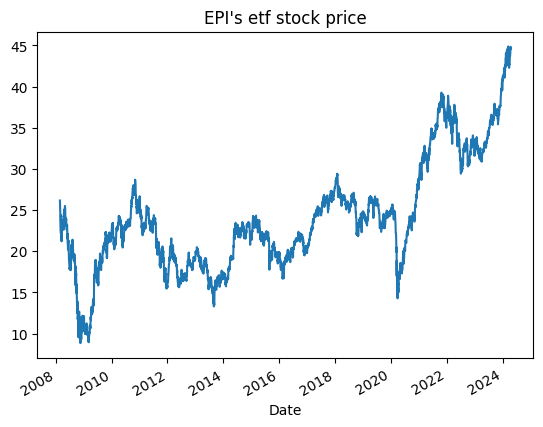

In [ ]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [ ]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [ ]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

## 2.3 Paid data - Poligon.io (news endpoint)

In [ ]:
# Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

In [ ]:
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

## 2.4 Macroeconomics

* add some indicator examples

In [ ]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [ ]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

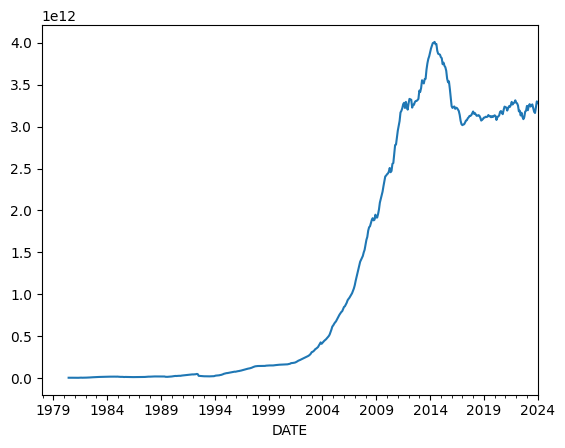

In [ ]:
gold_reserves.TRESEGCNM052N.plot.line()

In [ ]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

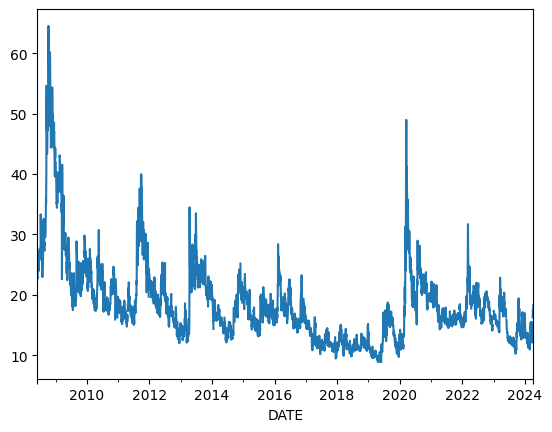

In [ ]:
gold_volatility.GVZCLS.plot.line()

In [ ]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

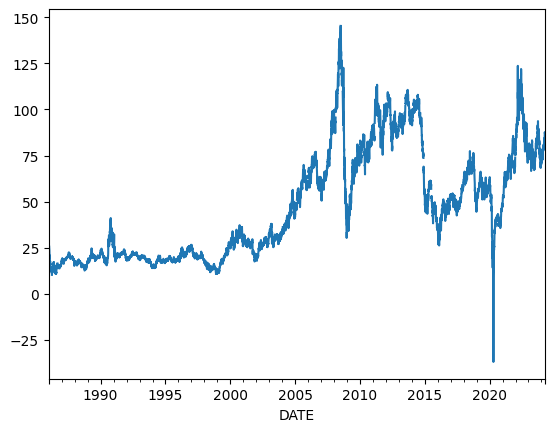

In [ ]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [ ]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

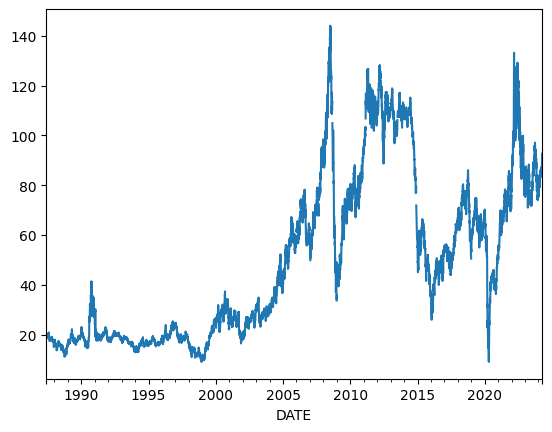

In [ ]:
oil_brent.DCOILBRENTEU.plot.line()

In [ ]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [ ]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0               Stock Market  5156.0    5210.0  5268.00      4.40   
1            GDP Growth Rate     3.4       4.9    34.80    -28.00   
2     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
3          Unemployment Rate     3.8       3.9    14.90      2.50   
4          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
5             Inflation Rate     3.5       3.2    23.70    -15.80   
6         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
7              Interest Rate     5.5       5.5    20.00      0.25   
8           Balance of Trade   -68.9     -67.6     1.95   -103.00   
9            Current Account  -195.0    -196.0     9.96   -284.00   
10    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
11    Government Debt to GDP   129.0     127.0   129.00     31.80   
12         Government Budget    -5.8     -12.4     4.50    -15.00   
13       Business Confidence    50

In [ ]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Stock Market,5156.0,5210.0,5268.00,4.40,points,Apr/24
1,GDP Growth Rate,3.4,4.9,34.80,-28.00,percent,Dec/23
2,GDP Annual Growth Rate,3.1,2.9,13.40,-7.50,percent,Dec/23
3,Unemployment Rate,3.8,3.9,14.90,2.50,percent,Mar/24
4,Non Farm Payrolls,303.0,270.0,4615.00,-20477.00,Thousand,Mar/24
5,Inflation Rate,3.5,3.2,23.70,-15.80,percent,Mar/24
6,Inflation Rate MoM,0.4,0.4,2.00,-1.80,percent,Mar/24
7,Interest Rate,5.5,5.5,20.00,0.25,percent,Mar/24
8,Balance of Trade,-68.9,-67.6,1.95,-103.00,USD Billion,Feb/24
9,Current Account,-195.0,-196.0,9.96,-284.00,USD Billion,Dec/23


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [ ]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [ ]:
# yearly financials for the last 4 years
nvda.financials


,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [ ]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [ ]:
# Basic info:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [ ]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

2175.9750366210938

In [ ]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [129]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/most-profitable-companies/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/most-profitable-companies/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [130]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [133]:
global_stocks.head()

,Rank,Name,Symbol,earnings_ttm,price (USD),country
0,1,Saudi Aramco,2222.SR,2.369640e+11,7.98,Saudi Arabia
1,2,Berkshire Hathaway,BRK-B,1.251690e+11,405.08,United States
2,3,Apple,AAPL,1.214160e+11,165.00,United States
3,4,Microsoft,MSFT,1.012100e+11,399.12,United States
4,5,Alphabet (Google),GOOG,8.602500e+10,155.72,United States


In [ ]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8374 non-null   int64  
 1   Name         8374 non-null   object 
 2   Symbol       8373 non-null   object 
 3   marketcap    8374 non-null   int64  
 4   price (USD)  8374 non-null   float64
 5   country      8372 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 392.7+ KB
